In [ ]:
import os

root_path = '/content/drive/My Drive/Raw_Dataset'

folders_dict = {}
for folder_name in os.listdir(root_path):
    folder_path = os.path.join(root_path, folder_name)
    if os.path.isdir(folder_path):
        folders_dict[folder_name] = []
        if folder_name == 'New_Dataset_261223':
          tfolder = os.listdir(folder_path)
          folder_path = os.path.join(folder_path, tfolder[0])
        for subfolder_name in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder_name)

            if os.path.isdir(subfolder_path):
                folders_dict[folder_name].append(subfolder_name)

for folder, subfolders in folders_dict.items():
    print(f"Folder: {folder}")
    print(f"Subfolders: {subfolders}")
    print()

Folder: New_Dataset_080424
Subfolders: ['Purple_Blotch_Annotated', 'Basal_Rot', 'Stemphylium_Blight']

Folder: New_Dataset_261223
Subfolders: ['Anthracnose', 'Healthy']

Folder: New_Dataset-030923
Subfolders: ['Healthy_Bulb', 'IYSV', 'Thrips Insect photo', 'Bulb Rot', 'Healthy_Seed', 'Thrips symtom']

Folder: New_Dataset-220424
Subfolders: ['Anthracnose', 'Healthy', 'Purple Blotch', 'Stemphylium', 'Twister']



In [ ]:
folders_dict

{'New_Dataset_080424': ['Purple_Blotch_Annotated',
  'Basal_Rot',
  'Stemphylium_Blight'],
 'New_Dataset_261223': ['Anthracnose', 'Healthy'],
 'New_Dataset-030923': ['Healthy_Bulb',
  'IYSV',
  'Thrips Insect photo',
  'Bulb Rot',
  'Healthy_Seed',
  'Thrips symtom'],
 'New_Dataset-220424': ['Anthracnose',
  'Healthy',
  'Purple Blotch',
  'Stemphylium',
  'Twister']}

In [ ]:
import os
root_path = '/content/drive/My Drive/Raw_Dataset'
jpg_files_dict = {}

def collect_jpg_files(folder_path):
    jpg_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]
    jpg_files_paths = [os.path.join(folder_path, f) for f in jpg_files]
    return jpg_files_paths

for main_folder, subfolders in folders_dict.items():
    main_folder_path = os.path.join(root_path, main_folder)
    if main_folder == 'New_Dataset_261223':
      tfolder = os.listdir(main_folder_path)
      main_folder_path = os.path.join(folder_path, tfolder[0])
    for subfolder in subfolders:
        subfolder_path = os.path.join(main_folder_path, subfolder)

        if os.path.isdir(subfolder_path):
            jpg_files = collect_jpg_files(subfolder_path)
            jpg_files_dict[subfolder] = jpg_files

In [ ]:
for subfolder, jpg_files in jpg_files_dict.items():
    print(f"Subfolder: {subfolder}")
    print(f"Number of JPEG files: {len(jpg_files)}")
    print()

Subfolder: Purple_Blotch_Annotated
Number of JPEG files: 197

Subfolder: Basal_Rot
Number of JPEG files: 140

Subfolder: Stemphylium_Blight
Number of JPEG files: 261

Subfolder: Healthy_Bulb
Number of JPEG files: 42

Subfolder: IYSV
Number of JPEG files: 754

Subfolder: Thrips Insect photo
Number of JPEG files: 240

Subfolder: Bulb Rot
Number of JPEG files: 669

Subfolder: Healthy_Seed
Number of JPEG files: 98

Subfolder: Thrips symtom
Number of JPEG files: 306

Subfolder: Anthracnose
Number of JPEG files: 204

Subfolder: Healthy
Number of JPEG files: 600

Subfolder: Purple Blotch
Number of JPEG files: 209

Subfolder: Stemphylium
Number of JPEG files: 400

Subfolder: Twister
Number of JPEG files: 317



In [ ]:
healthy_files = jpg_files_dict.pop('Healthy')
healthy_bulb_files = jpg_files_dict.pop('Healthy_Bulb')
healthy_seed = jpg_files_dict.pop('Healthy_Seed')
thrips_insect_photo = jpg_files_dict.pop('Thrips Insect photo')
thrips_symptom = jpg_files_dict.pop('Thrips symtom')
stemphylium_blight = jpg_files_dict.pop('Stemphylium_Blight')
stemphylium = jpg_files_dict.pop('Stemphylium')
merged_healthy_files = healthy_files + healthy_bulb_files + healthy_seed
merged_thrips = thrips_insect_photo + thrips_symptom
merged_stemphylium = stemphylium_blight + stemphylium
purple_blotch_annotated = jpg_files_dict.pop('Purple_Blotch_Annotated')
purple_blotch = jpg_files_dict.pop('Purple Blotch')
merged_purple_blotch = purple_blotch_annotated + purple_blotch
jpg_files_dict['Merged_Healthy'] = merged_healthy_files
jpg_files_dict['merged_thrips'] = merged_thrips
jpg_files_dict['merged_stemphylium'] = merged_stemphylium
jpg_files_dict['merged_purple_blotch'] = merged_purple_blotch

In [ ]:
for subfolder, jpg_files in jpg_files_dict.items():
    print(f"Subfolder: {subfolder}")
    print(f"Number of JPEG files: {len(jpg_files)}")
    print()

Subfolder: Basal_Rot
Number of JPEG files: 140

Subfolder: IYSV
Number of JPEG files: 754

Subfolder: Bulb Rot
Number of JPEG files: 669

Subfolder: Anthracnose
Number of JPEG files: 204

Subfolder: Twister
Number of JPEG files: 317

Subfolder: Merged_Healthy
Number of JPEG files: 740

Subfolder: merged_thrips
Number of JPEG files: 546

Subfolder: merged_stemphylium
Number of JPEG files: 661

Subfolder: merged_purple_blotch
Number of JPEG files: 406



In [ ]:
import os
import torch
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class CustomImageDataset(Dataset):
    def __init__(self, jpg_files_dict, transform=None):
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.label_map = {}
        self._prepare_data(jpg_files_dict)

    def _prepare_data(self, jpg_files_dict):
        for label_idx, (subfolder, file_paths) in enumerate(jpg_files_dict.items()):
            self.label_map[subfolder] = label_idx
            for file_path in file_paths:
                self.image_paths.append(file_path)
                self.labels.append(label_idx)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            image = Image.open(img_path).convert('RGB')
        except (OSError, IOError) as e:
            print(f'Error loading image {img_path}: {e}')
            image = Image.new('RGB', (224, 224))
            label = self.labels[idx]
        else:
            label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label
dataset = CustomImageDataset(jpg_files_dict=jpg_files_dict, transform=transform)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import numpy as np
import torch
class_counts = []
for subfolder, jpg_files in jpg_files_dict.items():
    class_counts.append(len(jpg_files))
def compute_class_weights(label_map, dataset):
    class_weights = np.max(class_counts) / class_counts
    class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
    return class_weights

class_weights = compute_class_weights(dataset.label_map, dataset)
criterion = nn.CrossEntropyLoss(weight=class_weights)


In [ ]:

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

In [ ]:
dataset.label_map

{'Basal_Rot': 0,
 'IYSV': 1,
 'Bulb Rot': 2,
 'Anthracnose': 3,
 'Twister': 4,
 'Merged_Healthy': 5,
 'merged_thrips': 6,
 'merged_stemphylium': 7,
 'merged_purple_blotch': 8}

In [15]:
model = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [17]:
import torch.nn as nn
print(nn.Linear(2048, 9))

Linear(in_features=2048, out_features=9, bias=True)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

model = models.resnet50(pretrained=True)
num_classes = len(jpg_files_dict)
model.fc = nn.Linear(model.fc.in_features, num_classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = criterion
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5):
    best_acc = 0.0
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)

        model.eval()
        corrects = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                corrects += (predicted == labels).sum().item()

        epoch_acc = corrects / total
        print(f'Epoch {epoch + 1}/{num_epochs} Loss: {epoch_loss:.4f} Accuracy: {epoch_acc:.4f}')

        if epoch_acc > best_acc:
            best_acc = epoch_acc
            torch.save(model.state_dict(), 'best_model.pth')
            print('Saved best model with accuracy: {:.4f}'.format(best_acc))

    print('Training complete.')
    print('Best Validation Accuracy: {:.4f}'.format(best_acc))

train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)
def evaluate_model(model, val_loader):
    model.eval()
    corrects = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            corrects += (predicted == labels).sum().item()

    accuracy = corrects / total
    print(f'Validation Accuracy: {accuracy:.4f}')

model.load_state_dict(torch.load('best_model.pth'))

evaluate_model(model, val_loader)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 129MB/s]


Error loading image /content/drive/My Drive/Raw_Dataset/New_Dataset_080424/Purple_Blotch_Annotated/PB_D_E6_21_11_2023_DSC_7578.JPG: broken data stream when reading image file
Error loading image /content/drive/My Drive/Raw_Dataset/New_Dataset_080424/Purple_Blotch_Annotated/PB_D_E6_18_11_2023_DSC_7116.JPG: broken data stream when reading image file
Error loading image /content/drive/My Drive/Raw_Dataset/New_Dataset_080424/Purple_Blotch_Annotated/PB_D_E6_21_11_2023_DSC_7631.JPG: broken data stream when reading image file
Error loading image /content/drive/My Drive/Raw_Dataset/New_Dataset_080424/Purple_Blotch_Annotated/PB_D_E6_18_11_2023_DSC_7118.JPG: broken data stream when reading image file
Error loading image /content/drive/My Drive/Raw_Dataset/New_Dataset_080424/Purple_Blotch_Annotated/PB_D_E6_18_11_2023_DSC_7113.JPG: broken data stream when reading image file
Error loading image /content/drive/My Drive/Raw_Dataset/New_Dataset_080424/Purple_Blotch_Annotated/PB_D_E6_21_11_2023_DSC_769

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
losses = []
validation_losses = []
model = models.resnet50(pretrained=True)
num_classes = len(jpg_files_dict)
model.fc = nn.Linear(model.fc.in_features, num_classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = criterion
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5):
    best_acc = 0.0
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        losses.append(epoch_loss)
        model.eval()
        corrects = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                corrects += (predicted == labels).sum().item()

        epoch_acc = corrects / total
        print(f'Epoch {epoch + 1}/{num_epochs} Loss: {epoch_loss:.4f} Accuracy: {epoch_acc:.4f}')

        if epoch_acc > best_acc:
            best_acc = epoch_acc
            torch.save(model.state_dict(), 'best_model.pth')
            print('Saved best model with accuracy: {:.4f}'.format(best_acc))

train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)
def evaluate_model(model, val_loader):
    model.eval()
    corrects = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            corrects += (predicted == labels).sum().item()

    accuracy = corrects / total
    print(f'Validation Accuracy: {accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 52.0MB/s]


Error loading image /content/drive/My Drive/Raw_Dataset/New_Dataset_080424/Purple_Blotch_Annotated/PB_D_E6_21_11_2023_DSC_7578.JPG: broken data stream when reading image file
Error loading image /content/drive/My Drive/Raw_Dataset/New_Dataset_080424/Purple_Blotch_Annotated/PB_D_E6_18_11_2023_DSC_7116.JPG: broken data stream when reading image file
Error loading image /content/drive/My Drive/Raw_Dataset/New_Dataset_080424/Purple_Blotch_Annotated/PB_D_E6_21_11_2023_DSC_7631.JPG: broken data stream when reading image file
Error loading image /content/drive/My Drive/Raw_Dataset/New_Dataset_080424/Purple_Blotch_Annotated/PB_D_E6_18_11_2023_DSC_7118.JPG: broken data stream when reading image file
Error loading image /content/drive/My Drive/Raw_Dataset/New_Dataset_080424/Purple_Blotch_Annotated/PB_D_E6_18_11_2023_DSC_7113.JPG: broken data stream when reading image file
Error loading image /content/drive/My Drive/Raw_Dataset/New_Dataset_080424/Purple_Blotch_Annotated/PB_D_E6_21_11_2023_DSC_769

In [3]:
model.load_state_dict(torch.load('best_model.pth'))
evaluate_model(model, val_loader)

Validation Accuracy: 0.6826


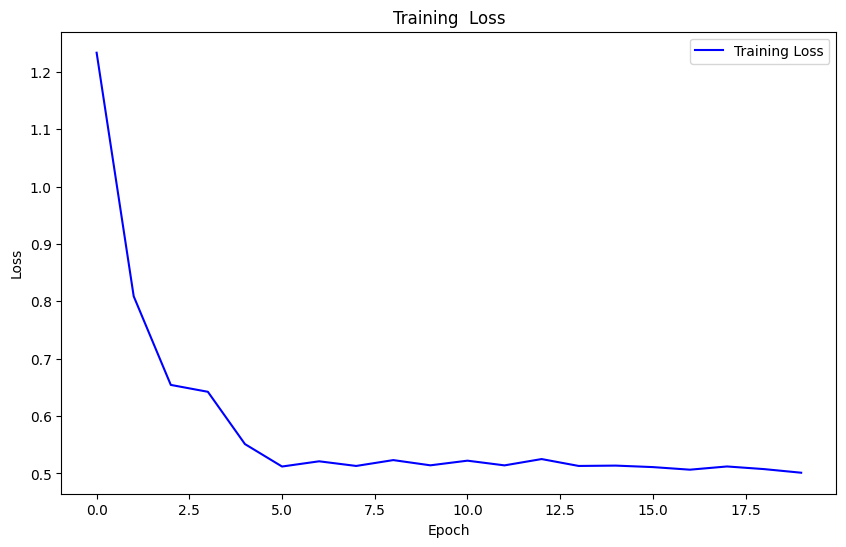

In [7]:
import numpy as np
import matplotlib.pyplot as plt
epochs = 20
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses, color='blue', label='Training Loss')
plt.title('Training  Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
import tensorflow as tf
binary_crossentropy = tf.keras.losses.BinaryCrossentropy()
y_true = tf.constant([1.0])
y_pred = tf.constant([0.1])
loss = binary_crossentropy(y_true, y_pred)
print("Binary Crossentropy Loss:", loss.numpy())

Binary Crossentropy Loss: 2.3025851
